In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
solver = "cbc"

*** 
Check-point 1:

**Build a network in PyPSA with one node (`bus`) named "Utopia" and attach an electricity load (`load`) to it. For simplicity, we assume the load profile to be flat for now. Afterwards, we want to supply electricy by attaching one gas-fired power plant implemented as (`generator`) (you have to call [`network.set_snapshots`](https://pypsa-readthedocs.readthedocs.io/en/readthedocs/api_reference.html?highlight=set_snapshots) to select a year). As help you should have a look at the [PyPSA documentation](https://pypsa-readthedocs.readthedocs.io/en/readthedocs/index.html) and the [minimal lopf example](https://www.pypsa.org/examples/minimal_example_lopf.html), understand what the [components documentation](https://pypsa-readthedocs.readthedocs.io/en/readthedocs/components.html) of PyPSA gives you and that you can find the underlying objective function and constraints in the [LOPF documentation](https://pypsa-readthedocs.readthedocs.io/en/readthedocs/optimal_power_flow.html).**

> **Remarks:** For time reasons, you do not have to build the network from scratch. However, to get you acquainted with PyPSA we have omitted a few elements or some of the parameters of the network marked by three question marks `???`. Either, you have to add an element similar to the one in the box above or add a few parameters.

#### Initialize network

In [3]:
# Create empty PyPSA network
network = pypsa.Network()

In [4]:
# Set snapshots to the year 2023 and at hourly resolution
snapshots = pd.date_range("01-01-2023", "01-01-2024", freq="H", inclusive="left")
network.set_snapshots(snapshots)

In [5]:
network.snapshots

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq='H')

Add `Utopia` bus with electricity as `carrier`

In [6]:
network.add(class_name="Bus", name="electricity")

In [7]:
network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
electricity,1.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,


Add constant hourly electricity load of `100MW`

In [8]:
network.add(class_name="Load", bus='electricity', name="electricity_load", p_set=100)

In [9]:
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
electricity_load,electricity,,,100.0,0.0,-1.0


Add a gas generator at the electricity bus with a capacity of 200MW and marginal cost of 20$/MWh to the network?

In [10]:
# Creating gas-fired powerplant
network.add(
    class_name="Generator",
    name="gas_power_plant",
    bus='electricity',
    carrier="gas",
    p_nom=200,
    marginal_cost=20,  # marginal cost of gas-fired power plant ($/MWh)
)


Now try to solve your network

In [11]:
# Solve network using cbc solver
network.optimize(pyomo=False, solver_name="cbc")

INFO:linopy.model: Solve problem using Cbc solver
INFO:linopy.model:Solver options:
 - pyomo: False
INFO:linopy.io: Writing time: 0.09s
INFO:linopy.solvers:Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 19 2023 

command line - cbc -printingOptions all -import /tmp/linopy-problem-ac9vs6y5.lp -pyomo False -solve -solu /tmp/linopy-solve-5t7bii2w.sol (default strategy 1)
Option for printingOptions changed from normal to all
No match for pyomo - ? for list of commands
No match for False - ? for list of commands
Presolve 0 (-26280) rows, 0 (-8760) columns and 0 (-26280) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 17520000
After Postsolve, objective 17520000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 17520000 - 0 iterations time 0.102, Presolve 0.10
Total time (CPU seconds):       0.71   (Wallclock seconds):       0.15


INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solu

('ok', 'optimal')

Lets look at some results! Back to read the docs. How would you look at results?

In [12]:
network.buses_t.marginal_price.head()

Bus,electricity
snapshot,
2023-01-01 00:00:00,20.0
2023-01-01 01:00:00,20.0
2023-01-01 02:00:00,20.0
2023-01-01 03:00:00,20.0
2023-01-01 04:00:00,20.0


In [13]:
network.generators_t.p.head()

Generator,gas_power_plant
snapshot,
2023-01-01 00:00:00,100.0
2023-01-01 01:00:00,100.0
2023-01-01 02:00:00,100.0
2023-01-01 03:00:00,100.0
2023-01-01 04:00:00,100.0


Ending of check-point 1 - export network

In [14]:
# Export network
network.export_to_netcdf("../results/network_d1_e1-1.nc")

INFO:pypsa.io:Exported network network_d1_e1-1.nc has buses, generators, loads


<xarray.Dataset> Size: 561kB
Dimensions:                       (snapshots: 8760, investment_periods: 0,
                                   buses_i: 1, buses_t_marginal_price_i: 1,
                                   generators_i: 1, generators_t_p_i: 1,
                                   loads_i: 1, loads_t_p_i: 1)
Coordinates:
  * snapshots                     (snapshots) int64 70kB 0 1 2 ... 8758 8759
  * investment_periods            (investment_periods) int64 0B 
  * buses_i                       (buses_i) object 8B 'electricity'
  * buses_t_marginal_price_i      (buses_t_marginal_price_i) object 8B 'elect...
  * generators_i                  (generators_i) object 8B 'gas_power_plant'
  * generators_t_p_i              (generators_t_p_i) object 8B 'gas_power_plant'
  * loads_i                       (loads_i) object 8B 'electricity_load'
  * loads_t_p_i                   (loads_t_p_i) object 8B 'electricity_load'
Data variables: (12/16)
    snapshots_snapshot            (snapshots) datetime64[ns] 70kB 2023-01-01 ...
    snapshots_objective           (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_stores              (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_generators          (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    investment_periods_objective  (investment_periods) object 0B 
    investment_periods_years      (investment_periods) object 0B 
    ...                            ...
    generators_marginal_cost      (generators_i) float64 8B 20.0
    generators_p_nom_opt          (generators_i) float64 8B 200.0
    generators_t_p                (snapshots, generators_t_p_i) float64 70kB ...
    loads_bus                     (loads_i) object 8B 'electricity'
    loads_p_set                   (loads_i) float64 8B 100.0
    loads_t_p                     (snapshots, loads_t_p_i) float64 70kB 100.0...
Attributes:
    network__linearized_uc:      0
    network__multi_invest:       0
    network_name:                
    network_objective:           17520000.0
    network_objective_constant:  0
    network_pypsa_version:       0.28.0
    network_srid:                4326
    crs:                         {"_crs": "GEOGCRS[\"WGS 84\",ENSEMBLE[\"Worl...
    meta:                        {}

***
Check-point 2:

**Remove the generator from the previous exercise and replace it with two actual power plants: one nuclear and one gas-fired. The annualized capital costs and marginal costs for these plants should be calculated using the provided input parameters. Instead of setting the plant capacities exogenously, allow the model to determine the optimal capacities based on the LOPF.**

Beginning

In [15]:
# Import check-point 1 network
network = pypsa.Network("../results/network_d1_e1-1.nc")

INFO:pypsa.io:Imported network network_d1_e1-1.nc has buses, generators, loads


In [16]:
# remove generator from previous check-point
network.remove(class_name="Generator", name="gas_power_plant")

In [17]:
network.generators

,bus,p_nom,carrier,marginal_cost,p_nom_opt,control,type,p_nom_mod,p_nom_extendable,p_nom_min,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight
Generator,,,,,,,,,,,,,,,,,,,,,


In [18]:
network.buses

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
electricity,1.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,


Add a nuclear powerplant to your network based on provided CAPEX, FOM, VOM, fuel_cost, efficiency, interest rate and lifetime.

> **Source:** all costs for the example are taken from PyPSA's technology database (https://github.com/PyPSA/technology-data)

In [19]:
# Nuclear power plant techno-economic parameters are given as:
lifetime = 40
interest = 0.05
CAPEX = 9453549 # $/MW
FOM = 120060  # $/MW fixed
VOM = 3.9 # $/MWh variable
fuel_cost = 3.75 # $/MWhth per unit Uranium consumed
efficiency = 0.326

In [20]:
# We need to calculate annualized capital expenditure
def calculate_annualised_capex(capex: float, interest: float, lifetime: int):
    crf = (
        interest * (1 + interest) ** lifetime / ((1 + interest) ** lifetime - 1)
    )  # Capital recovery factor
    return capex * crf

In [21]:
annualized_capex = calculate_annualised_capex(CAPEX, interest, lifetime)

network.add(
    class_name="Generator",
    name="nuclear_power_plant",
    bus='electricity',
    marginal_cost=VOM + fuel_cost/efficiency, #$/MWh
    capital_cost= annualized_capex + FOM, #$/MW
    p_nom_extendable = True,  # Allow endogenous investment
    efficiency=efficiency, 
)

In [22]:
network.generators

,bus,p_nom,carrier,marginal_cost,p_nom_opt,control,type,p_nom_mod,p_nom_extendable,p_nom_min,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight
Generator,,,,,,,,,,,,,,,,,,,,,
nuclear_power_plant,electricity,0.0,,15.403067,0.0,PQ,,0.0,True,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0


Add a gas-fired power plant to your network

In [23]:
# Gas-fired power plant techno-economic parameters are given as:
lifetime = 25
interest = 0.05
CAPEX = 995257 # $/MW
FOM = 33234 # $/MW fixed
VOM = 5  # $/MWh variable
fuel_cost = 24.57 # $/MWhth - per unit gas consumed
efficiency = 0.57

In [24]:
annualized_capex = calculate_annualised_capex(CAPEX, interest, lifetime)

network.add(
    class_name="Generator",
    name="gas_power_plant",
    bus='electricity',
    marginal_cost=VOM + fuel_cost/efficiency, #$/MWh
    capital_cost= annualized_capex + FOM, #$/MW
    p_nom_extendable = True,  # Allow endogenous investment
    efficiency=efficiency, 
)

In [25]:
network.generators

,bus,p_nom,carrier,marginal_cost,p_nom_opt,control,type,p_nom_mod,p_nom_extendable,p_nom_min,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight
Generator,,,,,,,,,,,,,,,,,,,,,
nuclear_power_plant,electricity,0.0,,15.403067,0.0,PQ,,0.0,True,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0
gas_power_plant,electricity,0.0,,48.105263,0.0,PQ,,0.0,True,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0


Ending of check-point 2 - Solve network, analyse results and export network

In [26]:
# Solve network using cbc solver
network.optimize(pyomo=False, solver_name="cbc")

INFO:linopy.model: Solve problem using Cbc solver
INFO:linopy.model:Solver options:
 - pyomo: False
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 2/2 [00:00<00:00, 77.78it/s]
INFO:linopy.io: Writing time: 0.23s
INFO:linopy.solvers:Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 19 2023 

command line - cbc -printingOptions all -import /tmp/linopy-problem-9boe0cji.lp -pyomo False -solve -solu /tmp/linopy-solve-uq4d__55.sol (default strategy 1)
Option for printingOptions changed from normal to all
No match for pyomo - ? for list of commands
No match for False - ? for list of commands
Presolve 17520 (-26282) rows, 8762 (-8760) columns and 35040 (-35042) elements
Perturbing problem by 0.1% of 32702.196 - largest nonzero change 0.12112706 ( 0.37039428%) - largest zero change 0
0  Obj 42140211 Primal inf 875999.99 (8760) Dual inf 285986.28 (8760)
312  Obj 14560205 Primal inf 875999.99 (8760)
624  Obj 15578809 Primal inf 875999.99 (8760)
9

('ok', 'optimal')

Look at your results! 

In [27]:
network.generators['p_nom_opt']

Generator
nuclear_power_plant      0.0
gas_power_plant        100.0
Name: p_nom_opt, dtype: float64

In [28]:
network.generators_t.p.head()

Generator,nuclear_power_plant,gas_power_plant
snapshot,,
2023-01-01 00:00:00,0.0,100.0
2023-01-01 01:00:00,0.0,100.0
2023-01-01 02:00:00,0.0,100.0
2023-01-01 03:00:00,0.0,100.0
2023-01-01 04:00:00,0.0,100.0


In [29]:
# Export network
network.export_to_netcdf("../results/network_d1_e1-2.nc")

INFO:pypsa.io:Exported network network_d1_e1-2.nc has buses, generators, loads


<xarray.Dataset> Size: 561kB
Dimensions:                       (snapshots: 8760, investment_periods: 0,
                                   buses_i: 1, buses_t_marginal_price_i: 1,
                                   generators_i: 2, generators_t_p_i: 1,
                                   loads_i: 1, loads_t_p_i: 1)
Coordinates:
  * snapshots                     (snapshots) int64 70kB 0 1 2 ... 8758 8759
  * investment_periods            (investment_periods) int64 0B 
  * buses_i                       (buses_i) object 8B 'electricity'
  * buses_t_marginal_price_i      (buses_t_marginal_price_i) object 8B 'elect...
  * generators_i                  (generators_i) object 16B 'nuclear_power_pl...
  * generators_t_p_i              (generators_t_p_i) object 8B 'gas_power_plant'
  * loads_i                       (loads_i) object 8B 'electricity_load'
  * loads_t_p_i                   (loads_t_p_i) object 8B 'electricity_load'
Data variables: (12/17)
    snapshots_snapshot            (snapshots) datetime64[ns] 70kB 2023-01-01 ...
    snapshots_objective           (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_generators          (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_stores              (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    investment_periods_objective  (investment_periods) float64 0B 
    investment_periods_years      (investment_periods) float64 0B 
    ...                            ...
    generators_capital_cost       (generators_i) float64 16B 6.71e+05 1.038e+05
    generators_efficiency         (generators_i) float64 16B 0.326 0.57
    generators_t_p                (snapshots, generators_t_p_i) float64 70kB ...
    loads_bus                     (loads_i) object 8B 'electricity'
    loads_p_set                   (loads_i) float64 8B 100.0
    loads_t_p                     (snapshots, loads_t_p_i) float64 70kB 100.0...
Attributes:
    network__linearized_uc:      0
    network__multi_invest:       0
    network_name:                
    network_objective:           52525203.5057322
    network_objective_constant:  0.0
    network_pypsa_version:       0.28.0
    network_srid:                4326
    crs:                         {"_crs": "GEOGCRS[\"WGS 84\",ENSEMBLE[\"Worl...
    meta:                        {}

***
Check-point 3:

**Add a VRE power plant to the network: Solar PV with extendable capacity.**

**Hint:** Solar PV can only provide electricity during day time and its generation pattern depends on solar irradiation**

In [30]:
# Import check-point 2 network
network = pypsa.Network("../results/network_d1_e1-2.nc")

INFO:pypsa.io:Imported network network_d1_e1-2.nc has buses, generators, loads


In [31]:
network.generators[['capital_cost', 'marginal_cost', 'p_nom_extendable']]

,capital_cost,marginal_cost,p_nom_extendable
Generator,,,
nuclear_power_plant,670995.452213,15.403067,True
gas_power_plant,103849.929794,48.105263,True


Import an example solar daily availability and assume same pattern throughout the year

In [32]:
# Import an example daily pattern
solar_pattern = pd.read_csv("../data/weather data/example_solar_daily_pattern.csv")["daily pattern"]
# annual time-series availability of solar farm(just a simplified example)
yearly_avail = pd.Series(list(solar_pattern) *365, index=network.snapshots)

<Axes: xlabel='snapshot'>

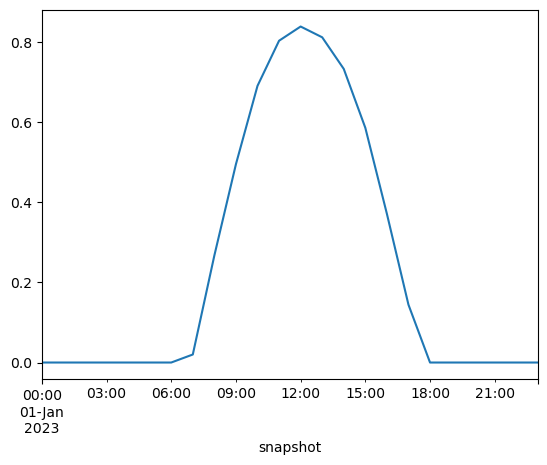

In [33]:
yearly_avail.head(24).plot()

Add a solar farm to your network

In [34]:
# Solar farm techno-economic parameters are given as:
lifetime = 37.5
interest = 0.05
CAPEX = 744227  # $/MW
FOM = 12856.5  # $/MW fixed
VOM = 0.0106  # $/MWh variable
fuel_cost = 0  # per unit of sun consumed

In [35]:
annualized_capex = calculate_annualised_capex(capex=CAPEX, interest=interest, lifetime=lifetime)

network.add(
    class_name="Generator",
    name="solar_farm",
    bus='electricity',
    marginal_cost=VOM,
    capital_cost=annualized_capex,
    p_nom_extendable=True,
    p_max_pu=yearly_avail,  # Solar farm availability
)

Ending of check-point 3 - Solve network, analyse results and export network

In [36]:
# Solve network using cbc solver
network.optimize(pyomo=False, solver_name="cbc")

INFO:linopy.model: Solve problem using Cbc solver
INFO:linopy.model:Solver options:
 - pyomo: False
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 2/2 [00:00<00:00, 48.53it/s]
INFO:linopy.io: Writing time: 0.29s
INFO:linopy.solvers:Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 19 2023 

command line - cbc -printingOptions all -import /tmp/linopy-problem-4vpaqkye.lp -pyomo False -solve -solu /tmp/linopy-solve-fqfv35i_.sol (default strategy 1)
Option for printingOptions changed from normal to all
No match for pyomo - ? for list of commands
No match for False - ? for list of commands
Presolve 25550 (-35773) rows, 16793 (-9490) columns and 55115 (-45263) elements
Perturbing problem by 0.001% of 153.25616 - largest nonzero change 0.0002532539 ( 8.2517057%) - largest zero change 0
0  Obj 22825947 Primal inf 932251.62 (8760) Dual inf 155171.07 (4745)
352  Obj 7677869.4 Primal inf 1042530.1 (8760)
704  Obj 7975118.2 Primal inf 1014412.5 (8

('ok', 'optimal')

In [37]:
# Inspect solar farm interaction with other powerplants to supply loads
network.generators['p_nom_opt']

Generator
nuclear_power_plant     -0.00000
gas_power_plant        100.00000
Solar_farm             144.93804
Name: p_nom_opt, dtype: float64

<Axes: xlabel='snapshot'>

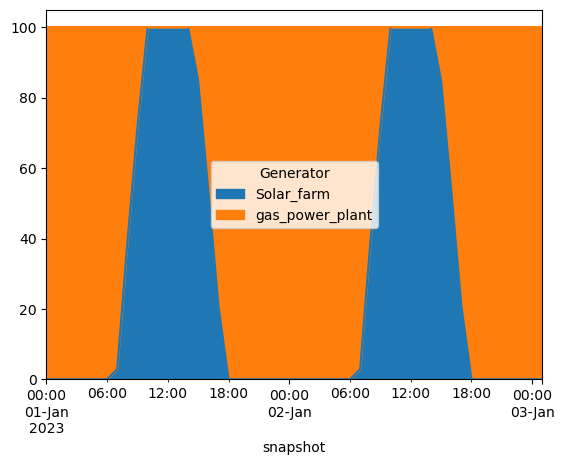

In [38]:
gen = network.generators_t.p
gen[['solar_farm', 'gas_power_plant']].head(50).plot(kind='area', stacked=True)

In [39]:
network.buses_t.marginal_price['electricity'].sort_values(ascending=False)

snapshot
2023-01-04 18:00:00    103898.040000
2023-01-01 00:00:00        48.105263
2023-08-21 06:00:00        48.105263
2023-08-21 22:00:00        48.105263
2023-08-21 21:00:00        48.105263
                           ...      
2023-10-26 12:00:00         0.010600
2023-10-26 11:00:00         0.010600
2023-02-25 11:00:00         0.010600
2023-02-25 12:00:00         0.010600
2023-07-02 12:00:00         0.010600
Name: electricity, Length: 8760, dtype: float64

In [40]:
# Exporting check-point 3 network
network.export_to_netcdf("../results/network_d1_e1-3.nc")

INFO:pypsa.io:Exported network network_d1_e1-3.nc has buses, generators, loads


<xarray.Dataset> Size: 771kB
Dimensions:                       (snapshots: 8760, investment_periods: 0,
                                   buses_i: 1, buses_t_p_i: 1,
                                   buses_t_marginal_price_i: 1,
                                   generators_i: 3, generators_t_p_max_pu_i: 1,
                                   generators_t_p_i: 2, loads_i: 1,
                                   loads_t_p_i: 1)
Coordinates:
  * snapshots                     (snapshots) int64 70kB 0 1 2 ... 8758 8759
  * investment_periods            (investment_periods) int64 0B 
  * buses_i                       (buses_i) object 8B 'electricity'
  * buses_t_p_i                   (buses_t_p_i) object 8B 'electricity'
  * buses_t_marginal_price_i      (buses_t_marginal_price_i) object 8B 'elect...
  * generators_i                  (generators_i) object 24B 'nuclear_power_pl...
  * generators_t_p_max_pu_i       (generators_t_p_max_pu_i) object 8B 'Solar_...
  * generators_t_p_i              (generators_t_p_i) object 16B 'gas_power_pl...
  * loads_i                       (loads_i) object 8B 'electricity_load'
  * loads_t_p_i                   (loads_t_p_i) object 8B 'electricity_load'
Data variables: (12/19)
    snapshots_snapshot            (snapshots) datetime64[ns] 70kB 2023-01-01 ...
    snapshots_objective           (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_generators          (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    snapshots_stores              (snapshots) float64 70kB 1.0 1.0 ... 1.0 1.0
    investment_periods_objective  (investment_periods) float64 0B 
    investment_periods_years      (investment_periods) float64 0B 
    ...                            ...
    generators_efficiency         (generators_i) float64 24B 0.326 0.57 1.0
    generators_t_p_max_pu         (snapshots, generators_t_p_max_pu_i) float64 70kB ...
    generators_t_p                (snapshots, generators_t_p_i) float64 140kB ...
    loads_bus                     (loads_i) object 8B 'electricity'
    loads_p_set                   (loads_i) float64 8B 100.0
    loads_t_p                     (snapshots, loads_t_p_i) float64 70kB 100.0...
Attributes:
    network__linearized_uc:      0
    network__multi_invest:       0
    network_name:                
    network_objective:           45383440.55630998
    network_objective_constant:  0.0
    network_pypsa_version:       0.28.0
    network_srid:                4326
    crs:                         {"_crs": "GEOGCRS[\"WGS 84\",ENSEMBLE[\"Worl...
    meta:                        {}